In [104]:
import numpy as np 
import pandas as pd 
from pandas import read_csv




CRIM: per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq. ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to five Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000's


In [105]:

#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX',
                'PTRATIO', 'B', 'LSTAT', 'PRICE']
data = read_csv('housing.csv', header=None,
                delimiter=r"\s+", names=column_names)



In [106]:
data.head(5) # pric ein thousand

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### cleaning data - check for missing value


In [107]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [109]:
# import for datavisulaization 
import matplotlib.pyplot as plt




####    Visulaize data - Histogram, Distribution and bar chart

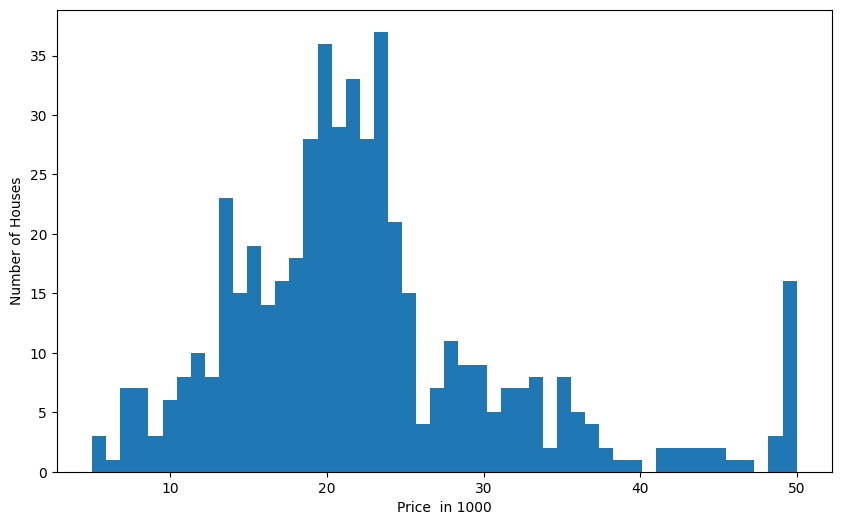

In [110]:
plt.figure(figsize=(10, 6))


plt.hist(data.PRICE, bins=50, ec='black') # bins = catagroiye into intividual group,
plt.xlabel('Price  in 1000')
plt.ylabel('Number of Houses')


plt.show()

In [111]:
import seaborn as sns

C:\Users\albin\AppData\Local\Temp\ipykernel_25168\503203586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.PRICE, bins=50, color='blue')


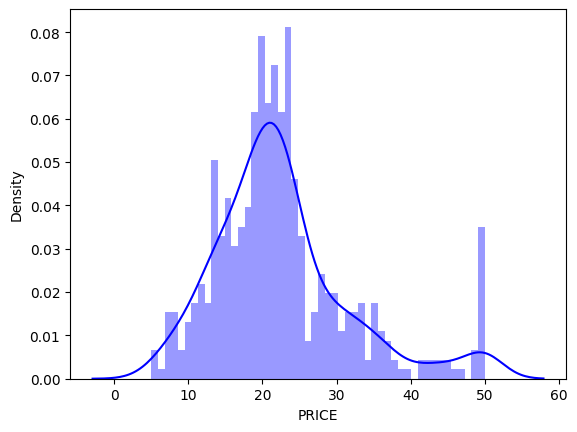

In [112]:
sns.distplot(data.PRICE, bins=50, color='blue')
plt.show()

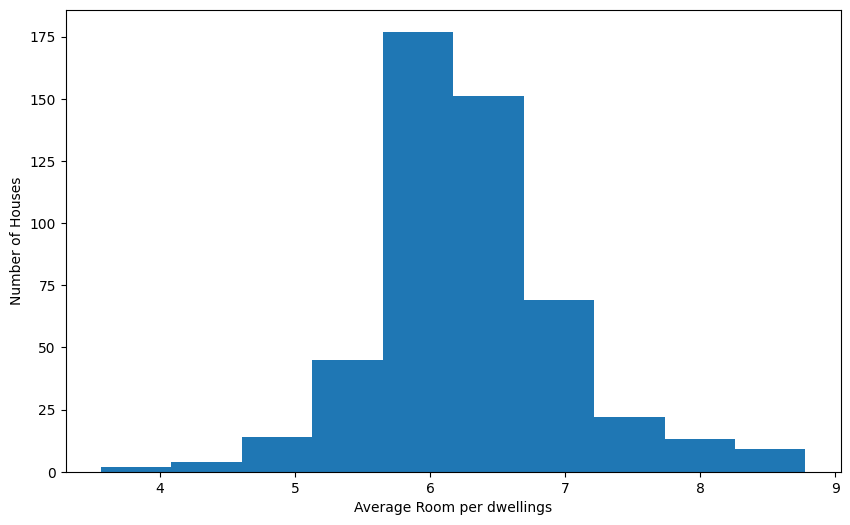

In [113]:
plt.figure(figsize=(10, 6))


plt.hist(data.RM, ec='black') # bins = catagroiye into intividual group,
plt.xlabel('Average Room per dwellings')
plt.ylabel('Number of Houses')


plt.show()

In [114]:
print("Average : ",data.RM.mean())


Average :  6.284634387351779


RAD - index of accessibility to radial highways

In [115]:
data.RAD.value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64

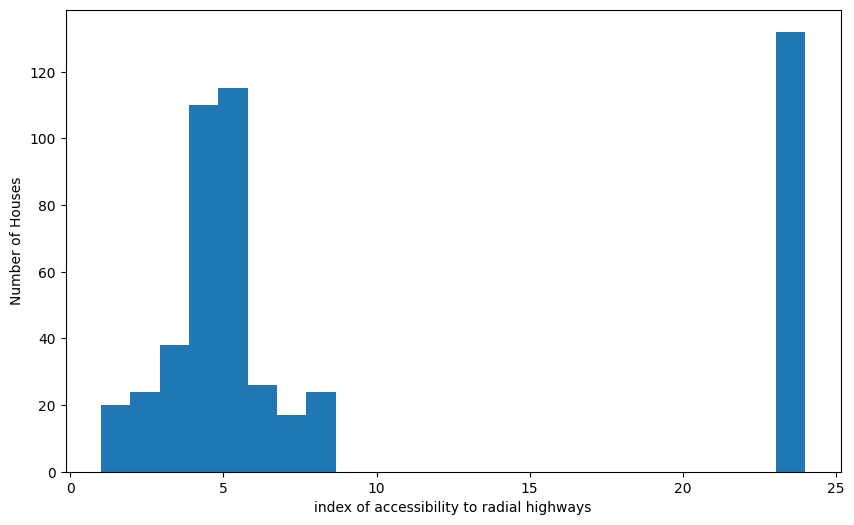

In [116]:
plt.figure(figsize=(10, 6))

plt.hist(data.RAD,bins=24, ec='black') # bins = catagroiye into intividual group,
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('Number of Houses')


plt.show()

In [117]:
frequency = data.RAD.value_counts()
type(frequency)

pandas.core.series.Series

In [118]:
data.RAD.value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: count, dtype: int64

In [119]:
frequency.index

Index([24, 5, 4, 3, 6, 8, 2, 1, 7], dtype='int64', name='RAD')

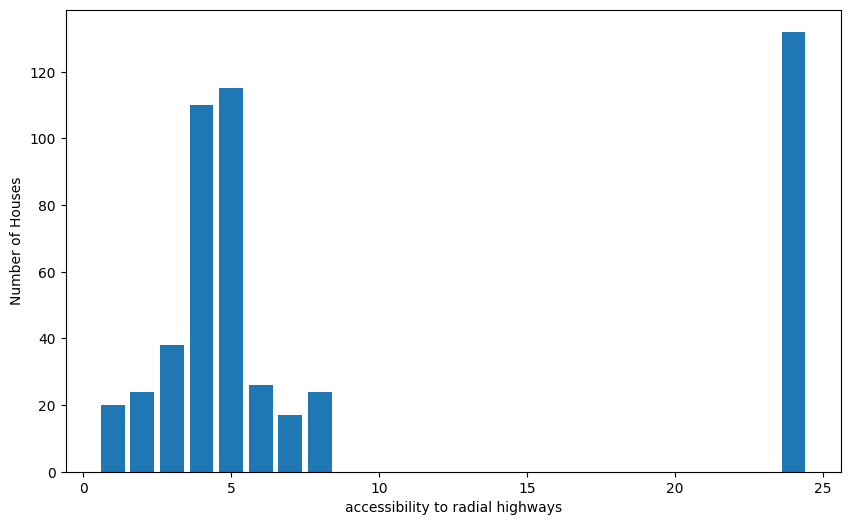

In [120]:
plt.figure(figsize=(10, 6))


plt.xlabel('accessibility to radial highways')
plt.ylabel('Number of Houses')

plt.bar(frequency.index, height=frequency)
plt.show()

### How the Price affect the propety near the Charles River


In [121]:
data.CHAS.value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

### Correlations



#### $$ \rho _{XY} = corr(X, Y) $$
#### $$ -1.0 \leq \rho _{XY} \leq +1.0 $$


In [122]:
# to find the correlaiton of iteam againist another feature
print(data.PRICE.corr(data.RM))

0.6953599470715393


In [123]:
print(data.PRICE.corr(data.PTRATIO))

-0.5077866855375616


In [124]:
data.corr() # Pearson correlation table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [125]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True # true 1 fasle 0

In [126]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

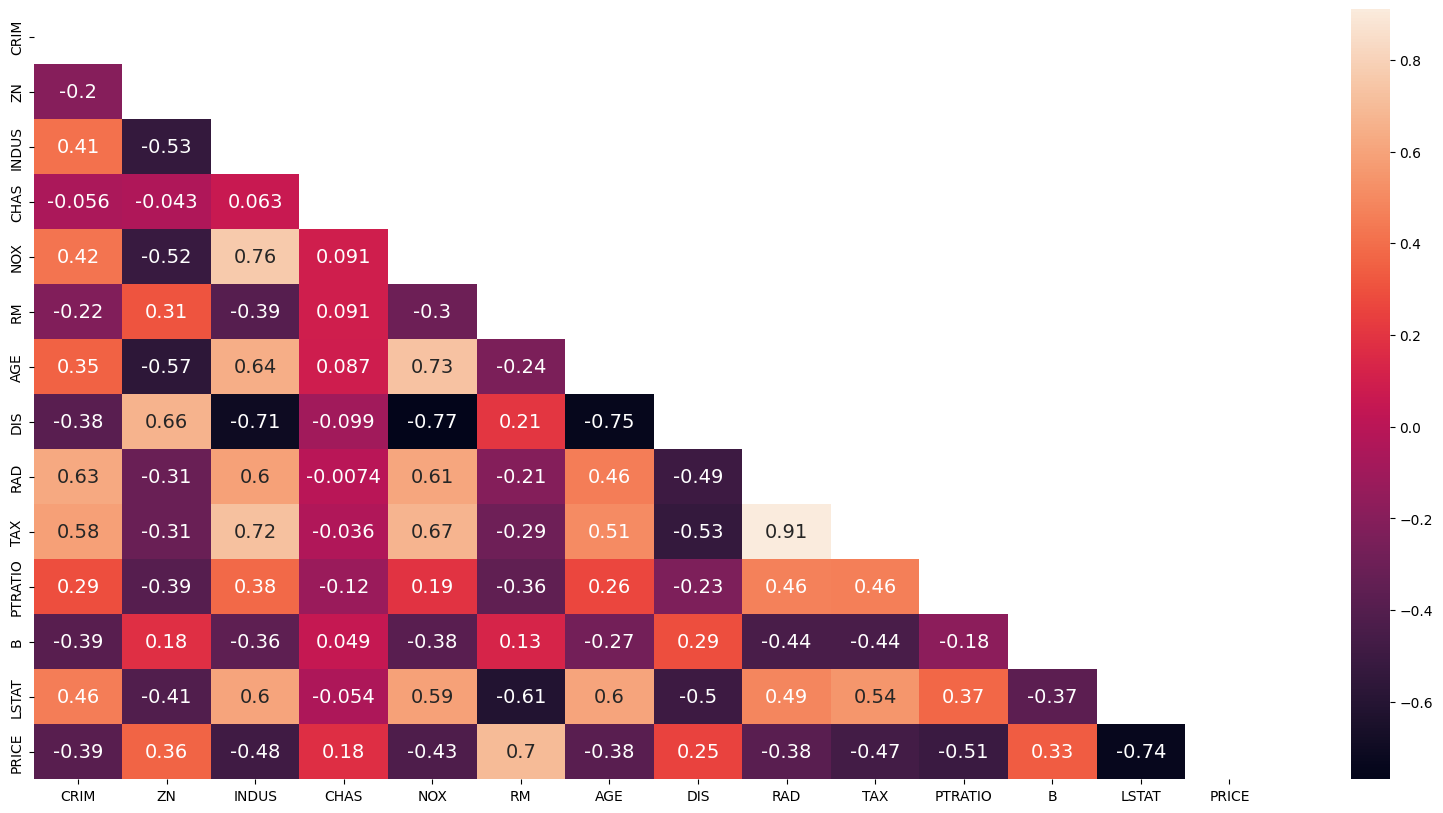

In [127]:
# visulaise the correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size' : 14})
plt.show()

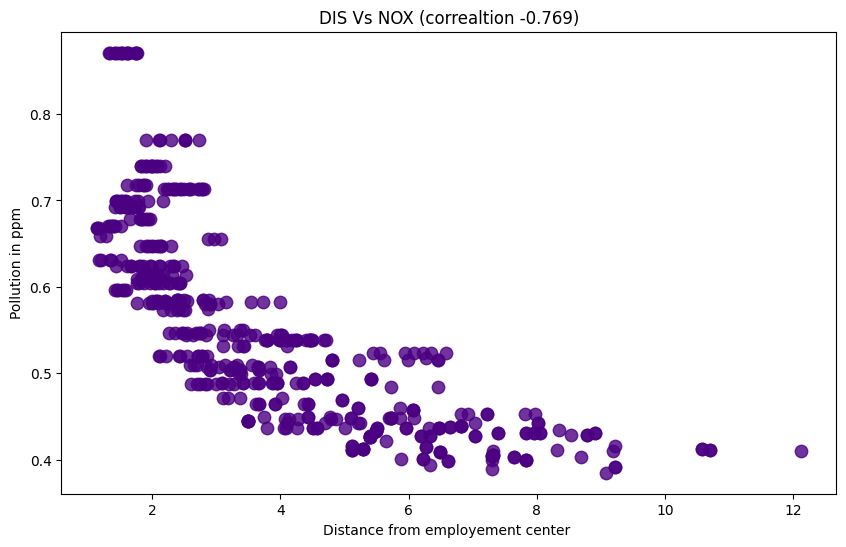

In [128]:
#find the correlration
nox_dis_corr = round(data.NOX.corr(data.DIS), 3)


#scatter plot between DIS and NOX
plt.figure(figsize=(10, 6))
plt.title(f'DIS Vs NOX (correaltion {nox_dis_corr})')
plt.xlabel('Distance from employement center ')
plt.ylabel('Pollution in ppm')
plt.scatter(data.DIS, data.NOX, alpha=0.8, s=80, color='indigo')
plt.show()

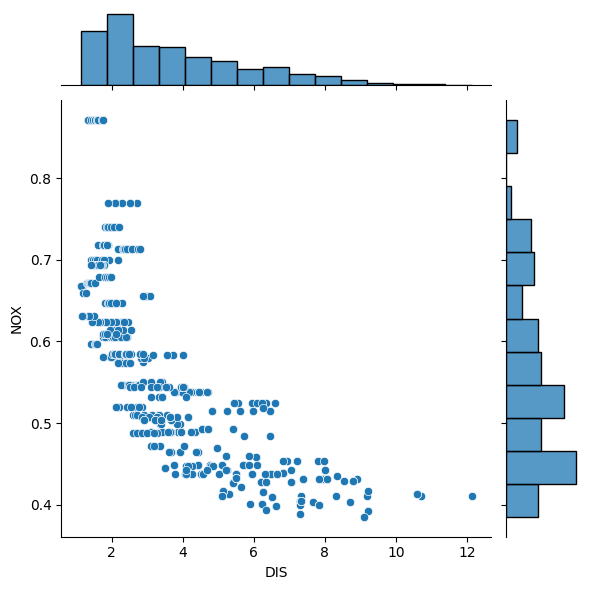

In [129]:
sns.jointplot(x=data.DIS, y=data.NOX)
plt.show()

### Training and Test Dataset Split

In [130]:
prices = data.PRICE
features = data.drop('PRICE', axis=1)

In [131]:
# import property for dataspliting
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

In [133]:
# verifiy the test amount
print('train split',round(len(X_train)/ len(features),2))
print('test split ',round(len(X_test)/ len(features), 2))


train split 0.8
test split  0.2


In [134]:
# Importing model
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [135]:
print('Intercept :', regr.intercept_)

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept : 36.533051382824254


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [136]:
# how well the model fit for the data
print('Training data r-squared : ', regr.score(X_train, y_train))
print('Test data r-squared : ', regr.score(X_test, y_test))

Training data r-squared :  0.750121534530608
Test data r-squared :  0.6709339839115627


### Data Transformation

In [137]:
data.PRICE.skew()

np.float64(1.1080984082549072)

In [138]:
y_log = np.log(data.PRICE)
y_log.tail()


501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

C:\Users\albin\AppData\Local\Temp\ipykernel_25168\1592208990.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


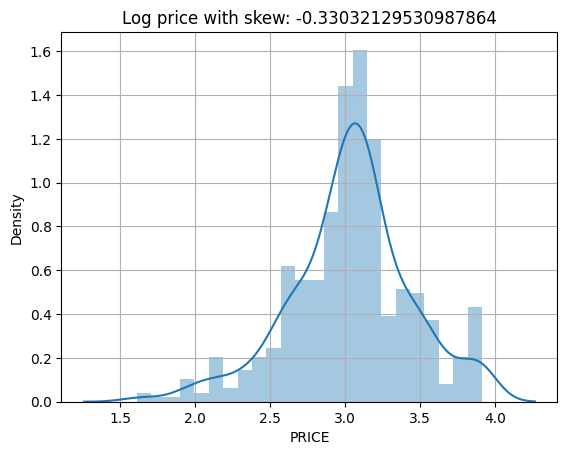

In [139]:
plt.title(f'Log price with skew: {y_log.skew()}')
sns.distplot(y_log)
plt.grid()
plt.show()

### Regression using LOG prices

In [140]:
prices = np.log(data.PRICE)
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


regr = LinearRegression()
regr.fit(X_train, y_train)
# how well the model fit for the data
print('Intercept :', regr.intercept_)
print('Training data r-squared : ', regr.score(X_train, y_train))
print('Test data r-squared : ', regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])


Intercept : 4.059943871775192
Training data r-squared :  0.7930234826697584
Test data r-squared :  0.7446922306260733


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


### Pvalues and Siginficance

In [141]:
import statsmodels.api as sm

In [142]:
x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
pd.DataFrame({'Coeff': results.params, 'Pvalues': round(results.pvalues, 3)})

,Coeff,Pvalues
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


### Testing Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 nox + .. + \alpha _{12}LSTAT $$

$$ VIF _{TAX} = \frac{1} {(1 - R _{TAX} ^ 2)} $$

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)

np.float64(1.714525044393249)

In [145]:
x_incl_const.values[0]

array([1.0000e+00, 8.8730e-02, 2.1000e+01, 5.6400e+00, 0.0000e+00,
       4.3900e-01, 5.9630e+00, 4.5700e+01, 6.8147e+00, 4.0000e+00,
       2.4300e+02, 1.6800e+01, 3.9556e+02, 1.3450e+01])

In [146]:
vif = []

for i in range(len(x_incl_const.columns)):

   values = variance_inflation_factor(exog=x_incl_const.values, exog_idx=i)
   vif.append(values)

In [147]:
pd.DataFrame({'coef': x_incl_const.columns, 'vif' :np.around(vif, 2)})

,coef,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


### Model Simplification and BIC

In [148]:
# Original Model with log price and all features

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
original_coeff = pd.DataFrame({'Coeff': results.params, 'Pvalues': round(results.pvalues, 3)})

print('BIC is: ', results.bic)
print('R-squared : ', results.rsquared)


BIC is:  -139.7499776947892
R-squared :  0.7930234826697584


In [149]:
# Model_1 excluding INDUS

x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
model_1_coeff = pd.DataFrame({'Coeff': results.params, 'Pvalues': round(results.pvalues, 3)})

print('BIC is: ', results.bic)
print('R-squared : ', results.rsquared)


BIC is:  -145.14508855591163
R-squared :  0.7927126289415163


In [150]:
# Model_2 excluding INDUS, AGE

x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
model_2_coeff = pd.DataFrame({'Coeff': results.params, 'Pvalues': round(results.pvalues, 3)})

print('BIC is: ', results.bic)
print('R-squared : ', results.rsquared)


BIC is:  -149.49934294224678
R-squared :  0.7918657661852815


In [151]:
frames = [original_coeff, model_1_coeff, model_2_coeff]
pd.concat(frames, axis=1)

,Coeff,Pvalues,Coeff,Pvalues,Coeff,Pvalues
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000
